<a href="https://colab.research.google.com/github/divyam102/first-project-/blob/master/Cottondisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/My Drive/char-rnn-keras-master.zip'

Archive:  /content/drive/My Drive/char-rnn-keras-master.zip
   creating: char-rnn-keras-master/
  inflating: char-rnn-keras-master/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/char-rnn-keras-master/
  inflating: __MACOSX/char-rnn-keras-master/._.DS_Store  
  inflating: char-rnn-keras-master/.gitignore  
   creating: char-rnn-keras-master/__pycache__/
  inflating: char-rnn-keras-master/__pycache__/model.cpython-36.pyc  
   creating: char-rnn-keras-master/data/
  inflating: char-rnn-keras-master/data/char_to_idx.json  
  inflating: char-rnn-keras-master/data/input.txt  
   creating: char-rnn-keras-master/logs/
  inflating: char-rnn-keras-master/logs/training_log.csv  
   creating: char-rnn-keras-master/model/
  inflating: char-rnn-keras-master/model/model.10.h5  
  inflating: char-rnn-keras-master/model/model.100.h5  
  inflating: char-rnn-keras-master/model/weights.10.h5  
  inflating: char-rnn-keras-master/model/weights.100.h5  
  inflating: char-rnn-keras-master/model/weig

In [ ]:
!unzip '/content/drive/My Drive/train-20200930T101436Z-001.zip'

Archive:  /content/drive/My Drive/train-20200930T101436Z-001.zip
  inflating: train/diseased cotton plant/dd (561)_iaip.jpg  
  inflating: train/fresh cotton plant/dsd (285)_iaip.jpg  
  inflating: train/fresh cotton plant/dsd (434)_iaip.jpg  
  inflating: train/fresh cotton plant/dsd (235)_iaip.jpg  
  inflating: train/fresh cotton plant/dsd (438)_iaip.jpg  
  inflating: train/diseased cotton plant/dd (562)_iaip.jpg  
  inflating: train/diseased cotton plant/dd (560)_iaip.jpg  
  inflating: train/fresh cotton plant/dsd (376)_iaip.jpg  
  inflating: train/diseased cotton plant/dd (558)_iaip.jpg  
  inflating: train/diseased cotton plant/dd (554)_iaip.jpg  
  inflating: train/diseased cotton plant/dd (557)_iaip.jpg  
  inflating: train/diseased cotton plant/dd (555)_iaip.jpg  
  inflating: train/diseased cotton plant/dd (570)_iaip.jpg  
  inflating: train/fresh cotton plant/dsd (324)_iaip.jpg  
  inflating: train/diseased cotton leaf/dis_leaf (160)_iaip.jpg  
  inflating: train/diseased

In [ ]:
!unzip '/content/drive/My Drive/test.zip'

Archive:  /content/drive/My Drive/test.zip
   creating: test/diseased cotton leaf/
  inflating: test/diseased cotton leaf/dis_leaf (124).jpg  
  inflating: test/diseased cotton leaf/dis_leaf (248).jpg  
  inflating: test/diseased cotton leaf/dis_leaf (322).jpg  
   creating: test/diseased cotton plant/
  inflating: test/diseased cotton plant/dd (328).jpg  
  inflating: test/diseased cotton plant/dd (367).jpg  
  inflating: test/diseased cotton plant/dd (41).jpg  
  inflating: test/diseased cotton plant/dd (513).jpg  
  inflating: test/diseased cotton plant/dd (706).jpg  
   creating: test/fresh cotton leaf/
  inflating: test/fresh cotton leaf/d (341).jpg  
  inflating: test/fresh cotton leaf/d (366).jpg  
  inflating: test/fresh cotton leaf/d (378).jpg  
  inflating: test/fresh cotton leaf/d (384).jpg  
  inflating: test/fresh cotton leaf/d (396).jpg  
   creating: test/fresh cotton plant/
  inflating: test/fresh cotton plant/dsd (223).jpg  
  inflating: test/fresh cotton plant/dsd (22

In [ ]:
import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt 

In [ ]:
keras.__version__

'2.4.3'

In [ ]:
train_data_path = "/content/train"
test_data_path = "/content/test"

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img,ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2, shear_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_data_path, target_size=(150,150), batch_size = 32, class_mode = 'binary')

Found 1951 images belonging to 4 classes.


In [ ]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(test_data_path, target_size = (150,150), batch_size = 32, class_mode = 'binary')

Found 18 images belonging to 4 classes.


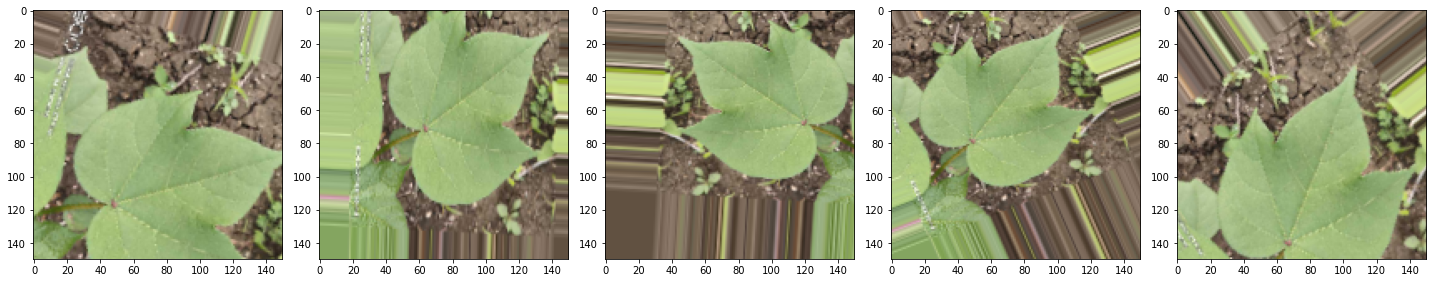

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
model_path = '/content/drive/My Drive/v4_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32, kernel_size=3, input_shape = [150, 150, 3]),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=64, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=128, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=256, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Dropout(0.5),
                                     keras.layers.Flatten(),
                                     keras.layers.Dense(units=128, activation='relu'),
                                     keras.layers.Dropout(0.1),
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units=4, activation='softmax')
])

In [ ]:
cnn_model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
history = cnn_model.fit(training_data, epochs=200, verbose=1, validation_data=valid_data, callbacks=callbacks_list)

Epoch 1/10
42/61 [===================>..........] - ETA: 34s - loss: 1.3019 - accuracy: 0.4085

KeyboardInterrupt: ignored

In [ ]:
model_path2 = "/content/drive/My Drive/v4_pred_cott_dis.h5"
cnn_model.save(model_path2)

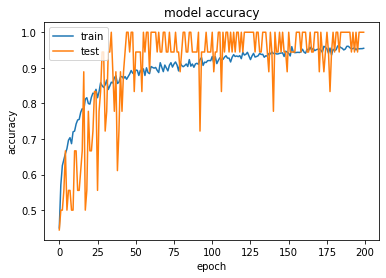

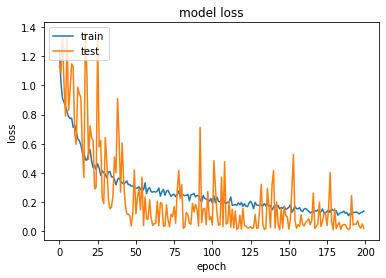

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/v4_pred_cott_dis.h5')

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/test/fresh cotton leaf/d (366).jpg', target_size = (150, 150, 3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [ ]:
if result[0][0] == 1:
  print("Disease cotton leaf")
elif result[0][1] == 1:
  print("Disease cotton leaf")
elif result[0][2] == 1:
  print("fresh cotton leaf")
else:
  print("fresh cotton plant")

fresh cotton leaf
